# 13주차 과제
환경적 요인이 건강,노화에 미치는 영향 분석

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

#데이터 갯수
n=100

#랜덤 시드 고정
np.random.seed(0)

# 독립변수 데이터 생성
# 체질량지수[kg/m^2]
bmi = np.random.normal(25, 10, n)  # 체질량지수
# 연평균소득[만원]
income = np.random.normal(5000, 1000, n)  # 연평균소득
# 흡연기간[년수]
smoking = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
smoking = smoking*np.random.uniform(1, 30, n)

#종속변수 데이터 생성. 질병여부(0: 없음, 1: 있음)
disease = (2.0*bmi + 0.01*income + 1.2*smoking + np.random.normal(0, 5, n)) > 100
disease = disease.astype(int)

# 데이터프레임 생성
df = pd.DataFrame({
    'BMI': bmi,
    'Income': income,
    'Smoking': smoking,
    'Disease': disease
})

#데이터프레임 출력
df.head()

,BMI,Income,Smoking,Disease
0,42.640523,6883.150697,12.387595,1
1,29.001572,3652.240939,0.000000,0
2,34.787380,3729.515002,0.000000,1
3,47.408932,5969.396708,0.000000,1
4,43.675580,3826.876595,0.000000,1


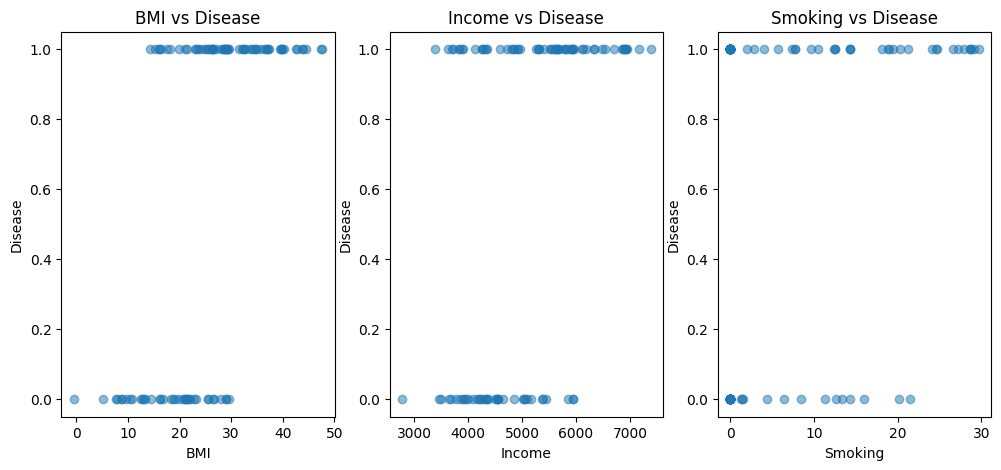

In [30]:
# 종속변수와 독립변수의 데이터 시각화
#시각화 함수 정의
def plotResults(df, x, y, ax):
    # 산점도 그래프 그리기
    ax.scatter(df[x], df[y], alpha=0.5)

    #제목, x축, y축 레이블 설정
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')

# 시각화 함수 호출
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
plotResults(df, 'BMI', 'Disease', ax[0])
plotResults(df, 'Income', 'Disease', ax[1])
plotResults(df, 'Smoking', 'Disease', ax[2])


# 다중선형 회귀모형 적용

In [31]:
# 이항 로지스틱회귀모형 적합을 위한 공식 설정
formula_ols = 'Disease ~ BMI + Income + Smoking'

#이항 로지스틱회귀모형 적합 ols() 대신 logit() 사용
model_ols = smf.ols(formula_ols, data=df).fit()

# 결과 출력
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     45.52
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.19e-18
Time:                        11:12:24   Log-Likelihood:                -25.376
No. Observations:                 100   AIC:                             58.75
Df Residuals:                      96   BIC:                             69.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0577      0.172     -6.139      0.0

# 이항 로지스틱 회귀모형 적용

In [32]:
# 이항 로지스틱회귀모형 적합을 위한 공식 설정
formula_logit = 'Disease ~ BMI + Income + Smoking'

#이항 로지스틱회귀모형 적합 ols() 대신 logit() 사용
model_logit = smf.logit(formula_logit, data=df).fit()

# 결과 출력
print(model_logit.summary())


Optimization terminated successfully.
         Current function value: 0.052427
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.9211
Time:                        11:12:24   Log-Likelihood:                -5.2427
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 2.433e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -108.3577     44.759     -2.421      0.015    -196.084     -20.631
BMI            2.3690      0

# 실제값과 예측값 비교 시각화
혼동행렬

In [33]:
list(zip(group_names,group_counts,group_percents))

[('TN', 100, '100.0%')]

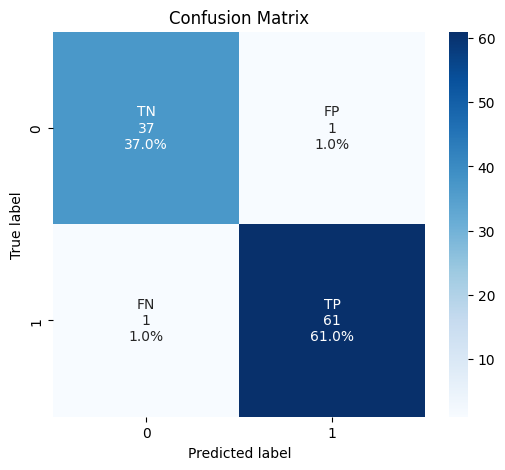

In [34]:
# 혼동행렬 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성
df['Predicted Prob'] = model_logit.predict()
df['predicted'] = df['Predicted Prob'] > 0.5

# 혼동행렬 계산
conf_matrix = confusion_matrix(df['Disease'], df['predicted'])

# ㅇ어노테이션 설정
group_names = ["TN", "FP", "FN", "TP"]
group_counts = [value for value in conf_matrix.flatten()]
group_percents = [f"{value:.1%}" for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percents)]
labels = np.asarray(labels).reshape(2,2)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


ROC 곡선 및 AUC 시각화

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# accuracy와 roc_auc 측정
print(f'Accuracy: {accuracy_score(df["Disease"], df["predicted"]):0.4f}')
print(f'AUC: {roc_auc_score(df["Disease"], df["predicted"]):0.4f}')


Accuracy: 0.9800
AUC: 0.9788


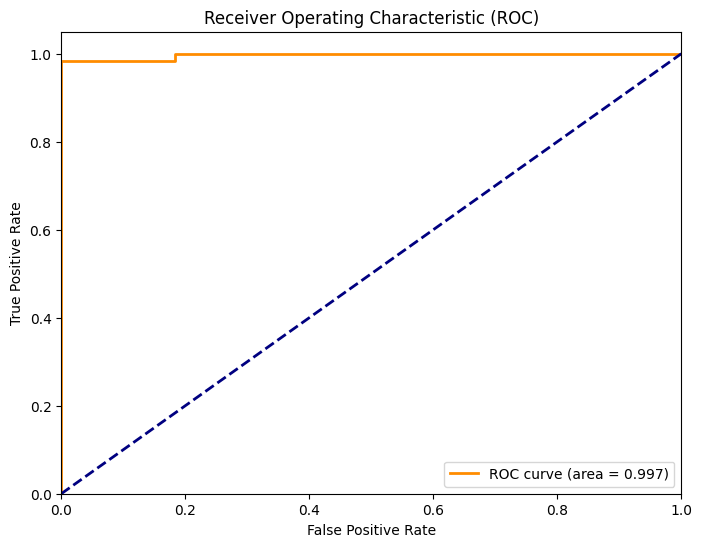

In [36]:
#FPTR, TPR, Thresholds 계산
fpr, tpr, thresholds = roc_curve(df['Disease'], df['Predicted Prob'])

# AUC 계산
roc_auc = auc(fpr, tpr)

#ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# 연습

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 데이터 갯수
n = 100

# 랜덤 시드 고정
np.random.seed(0)

# 독립변수 데이터 생성
#하루 평균 공부 시간
study_hours = np.random.normal(3, 1, n)
# 수업 출석률
attendance = np.random.normal(90, 5, n)
#학원 여부(0: 없음, 1: 있음)
tutoring = np.random.choice([0, 1], size=n, p=[0.7, 0.3])

# 종속변수 데이터 생성, 합격 여부(0:불합격, 1:합격)
score = 2.0*study_hours + 0.1*attendance + 1.0*tutoring + np.random.normal(0, 3, n)
# 임계값을 중앙값으로 설정해 0과 1이 골고루 나오게 함
result = np.median(score)
pass_exam = (score > result).astype(int)

# 데이터프레임 생성
df = pd.DataFrame({
    'StudyHours': study_hours,
    'Attendance': attendance,
    'Tutoring': tutoring,
    'Pass': pass_exam
})

# 데이터프레임 출력
print(df.head())

   StudyHours  Attendance  Tutoring  Pass
0    4.764052   99.415753         1     1
1    3.400157   83.261205         0     1
2    3.978738   83.647575         0     0
3    5.240893   94.846984         0     1
4    4.867558   84.134383         0     1


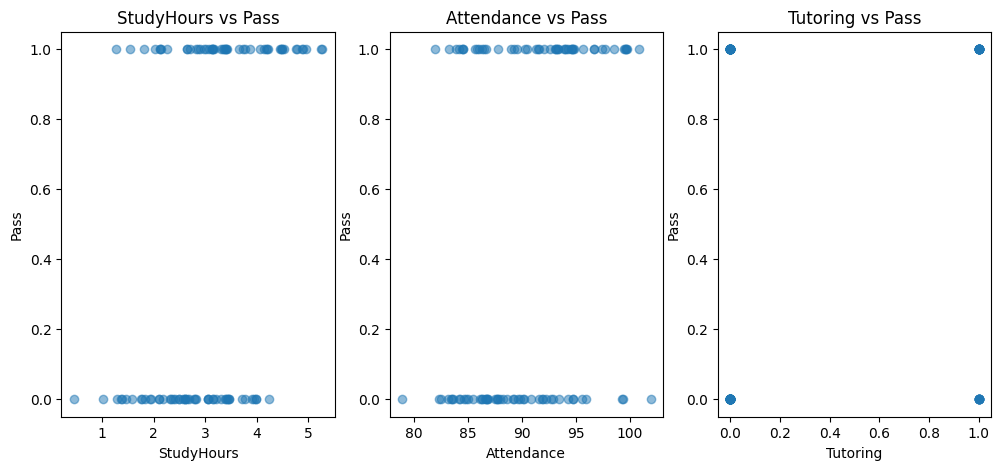

In [57]:
# 종속변수와 독립변수의 데이터 시각화
#시각화 함수 정의
def plotResults(df, x, y, ax):
    # 산점도 그래프 그리기
    ax.scatter(df[x], df[y], alpha=0.5)

    #제목, x축, y축 레이블 설정
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')

# 시각화 함수 호출
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
plotResults(df, 'StudyHours', 'Pass', ax[0])
plotResults(df, 'Attendance', 'Pass', ax[1])
plotResults(df, 'Tutoring', 'Pass', ax[2])



다중선형 회귀 모형 적용

In [58]:
# 이항 로지스틱회귀모형 적합을 위한 공식 설정
formula_ols = 'Pass ~ StudyHours + Attendance + Tutoring'

#이항 로지스틱회귀모형 적합 ols() 대신 logit() 사용
model_ols = smf.ols(formula_ols, data=df).fit()

# 결과 출력
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pass   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     11.30
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.04e-06
Time:                        11:19:15   Log-Likelihood:                -57.453
No. Observations:                 100   AIC:                             122.9
Df Residuals:                      96   BIC:                             133.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3042      0.770     -2.994      0.0

이항 로지스틱회귀모형 적용


In [59]:
# 이항 로지스틱회귀모형 적합을 위한 공식 설정
formula_logit = 'Pass ~ StudyHours + Attendance + Tutoring'

#이항 로지스틱회귀모형 적합 ols() 대신 logit() 사용
model_logit = smf.logit(formula_logit, data=df).fit()

# 결과 출력
print(model_logit.summary())


Optimization terminated successfully.
         Current function value: 0.539182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                  0.2221
Time:                        11:19:17   Log-Likelihood:                -53.918
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 9.398e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.3162      4.537     -3.376      0.001     -24.209      -6.424
StudyHours     1.1275      0.

# 실제,예측값 비교 시각화
혼동행렬

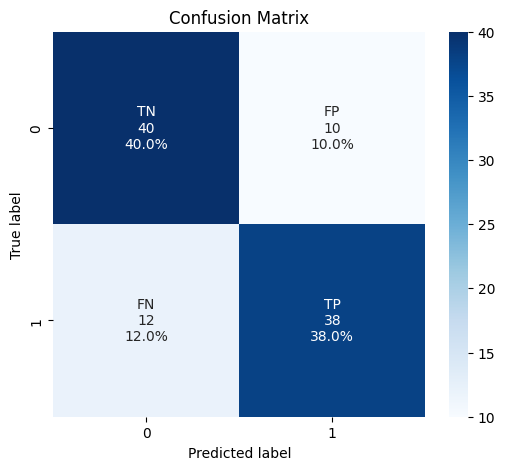

In [60]:


# 혼동행렬 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 예측값 생성
df['Predicted Prob'] = model_logit.predict()
df['predicted'] = df['Predicted Prob'] > 0.5

# 혼동행렬 계산
conf_matrix = confusion_matrix(df['Pass'], df['predicted'])

# 어노테이션 설정
group_names = ["TN", "FP", "FN", "TP"]
group_counts = [value for value in conf_matrix.flatten()]
group_percents = [f"{value:.1%}" for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percents)]
labels = np.asarray(labels).reshape(2,2)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


ROC곡선 및 AUC시각화

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# accuracy와 roc_auc 측정
print(f'Accuracy: {accuracy_score(df["Pass"], df["predicted"]):0.4f}')
print(f'AUC: {roc_auc_score(df["Pass"], df["predicted"]):0.4f}')

Accuracy: 0.7800
AUC: 0.7800


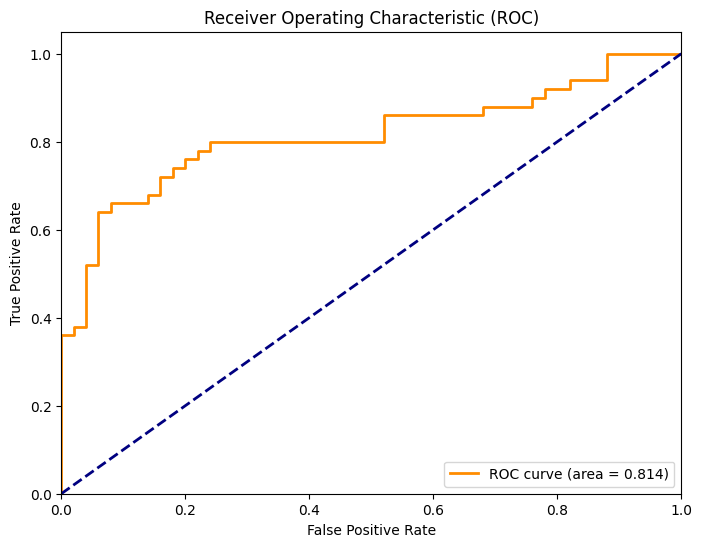

In [62]:
#FPTR, TPR, Thresholds 계산
fpr, tpr, thresholds = roc_curve(df['Pass'], df['Predicted Prob'])

# AUC 계산
roc_auc = auc(fpr, tpr)

#ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
